In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

Pretprocesiranje

In [14]:
df=pd.read_csv('dataset.csv')
df.drop('Unnamed',axis=1,inplace=True)
df['y'].replace({1:1,2:0,3:0,4:0,5:0},inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


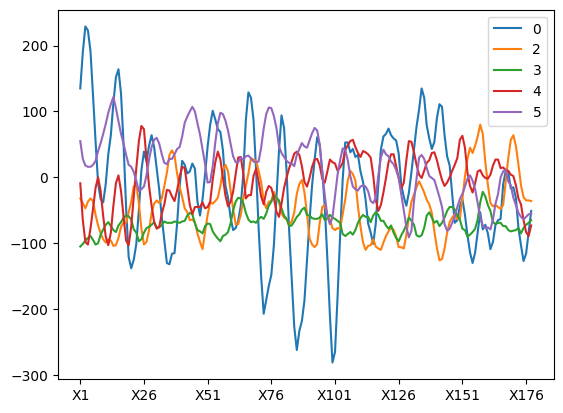

In [35]:
df2=df[df['y']==0].iloc[:5]
df2.T.iloc[:-1].plot()
plt.show()

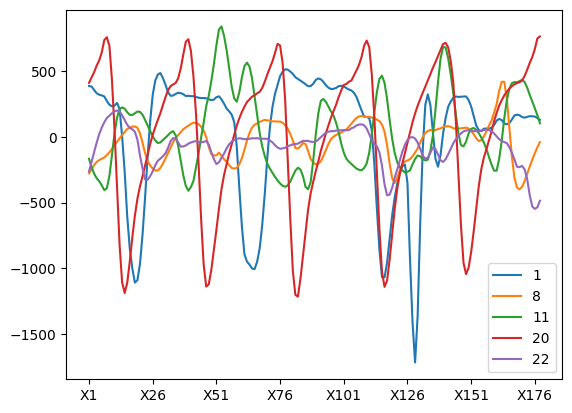

In [34]:
df2=df[df['y']==1].iloc[:5]
df2.T.iloc[:-1].plot()
plt.show()

In [80]:
normalized_signal=pd.DataFrame(preprocessing.normalize(df.drop(columns=['y'])),columns=df.columns[:-1])

stat_features=pd.DataFrame()
stat_features['std']=df.drop(columns=['y']).std(axis='columns')
stat_features['mean']=df.drop(columns=['y']).mean(axis='columns')
stat_features['first difference']=df.drop(columns=['y']).diff(axis='columns').abs().T.mean()
stat_features['first difference normalized']=normalized_signal.diff(axis='columns').diff(axis='columns').abs().T.mean()
stat_features['second difference']=df.drop(columns=['y']).diff(axis='columns').diff(axis='columns').abs().T.mean()
stat_features['second difference normalized']=normalized_signal.diff(axis='columns').abs().T.mean()
stat_features['y']=df['y']

stat_features.head()

,std,mean,first difference,first difference normalized,second difference,second difference normalized,y
0,95.980947,-16.910112,32.203390,0.017137,22.221591,0.024834,0
1,473.166815,28.112360,79.316384,0.007222,45.545455,0.012577,1
2,44.311025,-44.044944,13.887006,0.012792,10.647727,0.016684,0
3,15.968642,-68.910112,6.056497,0.006503,6.136364,0.006418,0
4,38.802149,-6.651685,15.468927,0.023886,12.511364,0.029532,0
